# Data Loading

Data merupakan dataset [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) dari kaggle

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 400 ~/.kaggle/kaggle.json
!kaggle datasets download -d arashnic/book-recommendation-dataset

 38% 9.00M/23.8M [00:00<00:00, 33.3MB/s]
100% 23.8M/23.8M [00:00<00:00, 78.8MB/s]


In [2]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# EDA

In [4]:
books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')
users_df = pd.read_csv('Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Dataset inspection

### Books

In [5]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


Kolom `Year-Of-Publication` seharusnya bertipe integer

In [8]:
with pd.option_context('display.max_colwidth', 400):
  display(books_df[~pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce').notnull()])

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


Sepertinya terdapat kesalahan format csv pada 3 baris tersebut

In [9]:
books_df.loc[books_df['ISBN'] == '078946697X', 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.loc[books_df['ISBN'] == '078946697X', 'Book-Author'] = 'Michael Teitelbaum'
books_df.loc[books_df['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
books_df.loc[books_df['ISBN'] == '078946697X', 'Publisher'] = 'DK Publishing Inc'

books_df.loc[books_df['ISBN'] == '2070426769', 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books_df.loc[books_df['ISBN'] == '2070426769', 'Book-Author'] = 'Jean-Marie Gustave Le Clezio'
books_df.loc[books_df['ISBN'] == '2070426769', 'Year-Of-Publication'] = 2003
books_df.loc[books_df['ISBN'] == '2070426769', 'Publisher'] = 'Gallimard'

books_df.loc[books_df['ISBN'] == '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.loc[books_df['ISBN'] == '0789466953', 'Book-Author'] = 'James Buckley'
books_df.loc[books_df['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000
books_df.loc[books_df['ISBN'] == '0789466953', 'Publisher'] = 'DK Publishing Inc'

In [10]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [11]:
books_df.describe()

,Year-Of-Publication
count,271360.000000
mean,1959.761273
std,257.992836
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


Terdapat buku yang dipublikasi di tahun 0, yang tidak masuk akal. Akan dicek distribusi buku yang dipublikasikan di tahun 1900 ke atas

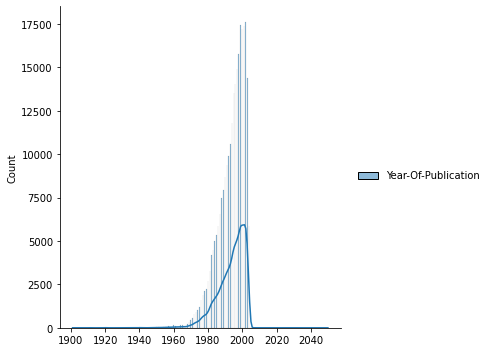

In [12]:
sns.displot(books_df[books_df['Year-Of-Publication'] > 1900], kde=True)

Sepertinya kebanyakan buku dipublikasikan dari tahun 1970 hingga 2010

In [13]:
books_df = books_df[(books_df['Year-Of-Publication'] >= 1970) & (books_df['Year-Of-Publication'] <= 2010)]

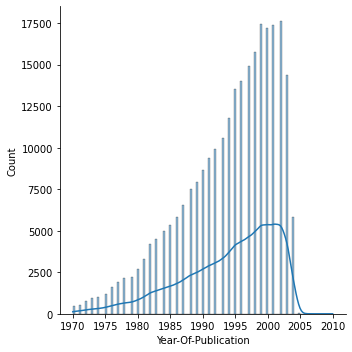

In [14]:
sns.displot(books_df['Year-Of-Publication'], kde=True)

Karena data buku sangatlah banyak, hanya akan diambil 20 ribu buku saja untuk percobaan

In [15]:
books_df = books_df.sample(20000, random_state=42)
books_df.shape

(20000, 8)

### Ratings

In [16]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [17]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Rating memiliki nilai dengan rentang 0 hingga 10

In [19]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

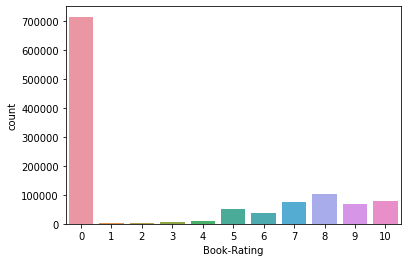

In [20]:
sns.countplot(x=ratings_df['Book-Rating'])

Buku dengan rating 0 sangatlah banyak

In [21]:
ratings_df[ratings_df['Book-Rating'] == 0][['ISBN']].merge(books_df, on='ISBN').groupby('Book-Title').count().sort_values('ISBN', ascending=False)

,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,
Angels &amp; Demons,317,317,317,317,317,317,317
Where the Heart Is (Oprah's Book Club (Paperback)),290,290,290,290,290,290,290
Sphere,232,232,232,232,232,232,232
Mystic River,212,212,212,212,212,212,212
The Prince of Tides,203,203,203,203,203,203,203
...,...,...,...,...,...,...,...
La Marche nuptiale,1,1,1,1,1,1,1
La MaÃ?Â®tresse n'aime pas,1,1,1,1,1,1,1
La Senda Secreta - 1,1,1,1,1,1,1,1


Akan dihapus saja data dengan rating 0

In [22]:
ratings_df = ratings_df[ratings_df['Book-Rating'] != 0].reset_index(drop=True)
ratings_df.shape

(433671, 3)

### Users

In [23]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


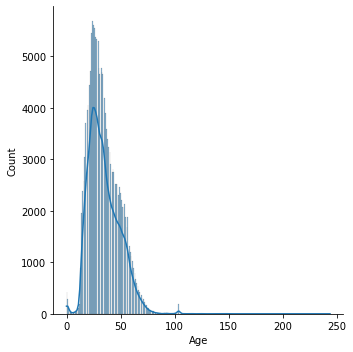

In [26]:
sns.displot(users_df['Age'], kde=True)

# Data preparation

## Books

Tidak membutuhkan `image-url`, sehingga di-drop saja

In [27]:
books_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [28]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [29]:
books_df.reset_index(drop=True, inplace=True)
books_df.shape

(20000, 5)

## Users

In [30]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Mengatasi null values pada kolom `Age`

In [31]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Terdapat user dengan umur 0 hingga 244, akan diambil user dengan umur 10 - 70

In [32]:
users_df = users_df[(users_df['Age'] >= 10) & (users_df['Age'] <= 70)]

Banyak kolom `Age` yang null, dari 270 ribu dataset jika didrop 110 ribu, masih banyak yang tersisa, sehingga didrop saja

In [33]:
users_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [34]:
users_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [35]:
users_df.reset_index(drop=True, inplace=True)
users_df.shape

(165064, 3)

## Merging dataset

In [36]:
_df1 = pd.merge(left=ratings_df, right=users_df, on='User-ID')

book_ratings_df = pd.merge(left=_df1, right=books_df, on='ISBN')
book_ratings_df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
1,276762,0380711524,5,"duisburg, nordrhein-westfalen, germany",25.0,See Jane Run,Joy Fielding,1992,Avon
2,12619,0380711524,5,"parksville, british columbia, canada",56.0,See Jane Run,Joy Fielding,1992,Avon
3,28204,0380711524,9,"south ohio, nova scotia, canada",61.0,See Jane Run,Joy Fielding,1992,Avon
4,83287,0380711524,10,"tulsa, oklahoma, usa",45.0,See Jane Run,Joy Fielding,1992,Avon
...,...,...,...,...,...,...,...,...,...
19487,276579,0679856994,6,"orem, utah, usa",12.0,New Tracks for Thomas (Pictureback Shapes),GAIL HERMAN,1994,Random House Books for Young Readers
19488,276626,0713477539,5,"frankfurt am main, hessen, germany",22.0,Quinlan's Film Directors,David Quinlan,1999,Sterling Pub Co Inc
19489,276656,0380799685,6,"port angeles, washington, usa",49.0,David Brin's Out of Time: Yanked! (David Brin'...,Nancy Kress,1999,Avon Books
19490,276670,0345420071,9,"toronto, ontario, canada",30.0,The Straight Dope Tells All,Cecil Adams,1998,Ballantine Books


# Modelling

## Content-based Filtering

Content-based filtering akan dilakukan dengan melihat author dari buku dan menggunakan cosine untuk menghitung kemiripan buku

In [37]:
book_author_df = books_df[['Book-Title', 'Book-Author']]
book_author_df

,Book-Title,Book-Author
0,Billie Dyer and Other Stories (Plume Contempor...,William Maxwell
1,"The 3,000 Mile Garden: An Exchange of Letters ...",Leslie Land
2,Roadfood,Jane Stern
3,Popular Folk Tales,Jacob Grimm
4,Price Of Honor (Wilders Of Wyatt County) (Spec...,Janis Reams Hudson
...,...,...
19995,Babydreams,Maxine Paetro
19996,Little Girl Lost (Her Protector) (Harlequin I...,Adrianne Lee
19997,MAMA'S BOY,Daniel King
19998,The Last Violet: Mourning My Mother,Lois T. Hjelmstad


In [38]:
vectorizer = TfidfVectorizer()
vectorizer.fit(book_author_df['Book-Author'])

tfidf_matrix = vectorizer.transform(book_author_df['Book-Author'])
tfidf_matrix.shape

(20000, 11582)

In [39]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=vectorizer.get_feature_names_out(),
    index=book_author_df['Book-Title']
).sample(22, axis=1).sample(10, axis=0)

,sambraus,kirchoff,tsunetomo,waesse,pragoff,milam,kimmel,litt,marilyn,gretta,...,maccormick,ready,mitchell,appignanesi,fonseca,forster,merimee,rachid,karbo,practical
Book-Title,,,,,,,,,,,,,,,,,,,,,
Rest: Experiencing God's Peace in a Restless World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adieux Ã Marguerite Yourcenar: Nouvelles occidentales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crimewarps: The Future of Crime in America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Human Aura: How to Activate and Energize Your Aura and Chakras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Silent Spring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Teeth of the Tiger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Masterpieces of African-American Literature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Indian Depredations in Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Distant Land of My Father,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_author_df['Book-Title'], columns=book_author_df['Book-Title'])
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Book-Title,Spellbound,Animal-Speak: The Spiritual &amp; Magical Powers of Creatures Great &amp; Small,Saturn's Child,Nine Parts of Desire: The Hidden World of Islamic Women,"Holy Bible, Woman Thou Art Loosed! Edition"
Book-Title,,,,,
To the Lighthouse (Essential.penguin S.),0.0,0.0,0.0,0.0,0.0
"On Writing Well, 25th Anniversary : The Classic Guide to Writing Nonfiction (On Writing Well)",0.0,0.0,0.0,0.0,0.0
For Special Services,0.0,0.0,0.0,0.0,0.0
Emma,0.0,0.0,0.0,0.0,0.0
The voyage out,0.0,0.0,0.0,0.0,0.0
In Search of Deep Throat : The Greatest Political Mystery of Our Time,0.0,0.0,0.0,0.0,0.0
August,0.0,0.0,0.0,0.0,0.0
Solaris,0.0,0.0,0.0,0.0,0.0
Streets of Fire,0.0,0.0,0.0,0.0,0.0


In [42]:
def book_recommendations(book_name, similarity_data=cosine_sim_df, items=book_author_df[['Book-Title', 'Book-Author']], k=5):
  index = similarity_data.loc[:, book_name].to_numpy().argpartition(range(-1, -k, -1))
  
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(book_name, errors='ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [43]:
book_index = random.choice(book_author_df.index)
title = book_author_df.iloc[book_index]['Book-Title']
author = book_author_df.iloc[book_index]['Book-Author']

print(f'Similar books to {title} ({author}) are:')

book_recommendations(title, k=10)

Similar books to MERCHANT OF VENICE (William Shakespeare) are:


,Book-Title,Book-Author
0,The Taming of the Shrew: With New Dramatic Cri...,William Shakespeare
1,Othello,William Shakespeare
2,HENRY IV PART 2,William Shakespeare
3,Hamlet (Everyman Paperback Classics),William Shakespeare
4,Midsummer Night's Dream (Everyman Paperback Cl...,William Shakespeare
5,Koenig Lear,William Shakespeare
6,The Norton Shakespeare: Based on the Oxford Ed...,William Shakespeare
7,The Tragedy of Othello the Moor of Venice: Wit...,William Shakespeare
8,Othello (The New Cambridge Shakespeare),William Shakespeare
9,The Merchant of Venice (World's Classics),William Shakespeare


## Collaborative-based Filtering

In [44]:
class RecommenderNet(tf.keras.models.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
      num_users,
      embedding_size,
      embeddings_initializer='he_normal',
      embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_users, 1)
    self.resto_embedding = tf.keras.layers.Embedding(
      num_books,
      embedding_size,
      embeddings_initializer='he_normal',
      embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
    )
    self.resto_bias = tf.keras.layers.Embedding(num_books, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x)

In [45]:
isbn_to_id = {v:k for k, v in enumerate(book_ratings_df['ISBN'].unique())}
id_to_isbn = {v:k for k, v in isbn_to_id.items()}
book_ratings_df['book_id'] = book_ratings_df['ISBN'].map(isbn_to_id)

user_to_id = {v:k for k, v in enumerate(book_ratings_df['User-ID'].unique())}
id_to_user = {v:k for k, v in user_to_id.items()}
book_ratings_df['user_id'] = book_ratings_df['User-ID'].map(user_to_id)

df = book_ratings_df.sample(frac=1, random_state=42).copy()
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,book_id,user_id
17035,173415,0399521542,8,"chicago, illinois, usa",31.0,Women Who Joke Too Much,Silver Rose,1995,Berkley Pub Group,6453,1276
5101,93319,0962655104,9,"ann arbor, michigan, usa",54.0,The Writings on the Wall: Peace at the Berlin ...,Terry Tillman,1990,22/7 Publishing Company,552,3561
17233,180571,3257217765,6,"bielefeld, nordrhein-westfalen, germany",52.0,Erogene Zone.,Philippe Djian,1989,Diogenes Verlag,6616,8046
12077,136252,0870529161,8,"santa fe, new mexico, usa",33.0,"The Cemetery Book: Graveyards, Catacombs and O...",Tom Weil,1991,Hippocrene Books,3103,4428
1027,135946,0446672211,10,"harwich, massachusetts, usa",36.0,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,75,908
...,...,...,...,...,...,...,...,...,...,...,...
11284,60337,0060914602,9,"st. marys, georgia, usa",50.0,All We Need of Hell: A Novel,Harry Crews,1988,Harpercollins,2687,2614
11964,218411,037571894X,10,"brighton, england, united kingdom",45.0,A Wild Sheep Chase,Haruki Murakami,2002,Vintage Books USA,3039,5585
5390,239736,0836217799,9,"paris, ile-de-france, france",20.0,Bring Me The Head Of Willy The Mailboy!,Scott Adams,1995,Andrews McMeel Publishing,606,3722
860,215543,3453007867,10,"karlsruhe, baden-wuerttemberg, germany",23.0,Friedhof der Kuscheltiere. Roman.,Stephen King,1988,Heyne,63,762


In [46]:
X = df[['user_id', 'book_id']].values
y = df['Book-Rating'].values / 10.0

train_size = round(0.1 * len(df))
X_train = X[:-train_size]
y_train = y[:-train_size]
X_test = X[-train_size:]
y_test = y[-train_size:]

In [47]:
model = RecommenderNet(len(user_to_id), len(isbn_to_id), 10)

model.compile(
    loss='mse',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [48]:
history = model.fit(
  X_train, y_train,
  epochs=20,
  validation_data=(X_test, y_test)
)

Epoch 1/20
549/549 [==============================] - 6s 4ms/step - loss: 0.1012 - val_loss: 0.0954
Epoch 2/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0679 - val_loss: 0.0832
Epoch 3/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0318 - val_loss: 0.0807
Epoch 4/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0297 - val_loss: 0.0815
Epoch 5/20
549/549 [==============================] - 3s 5ms/step - loss: 0.0283 - val_loss: 0.0813
Epoch 6/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0268 - val_loss: 0.0809
Epoch 7/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0256 - val_loss: 0.0804
Epoch 8/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0244 - val_loss: 0.0794
Epoch 9/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0234 - val_loss: 0.0788
Epoch 10/20
549/549 [==============================] - 2s 4ms/step - loss: 0.0223 - val_loss: 0.0779

In [49]:
def print_recommendation(user_id, top_n=10):
  books_read = book_ratings_df[book_ratings_df['user_id'] == user_id]['ISBN'].values
  books_not_read = books_df[~books_df['ISBN'].isin(books_read)]['ISBN'].values
  books_not_read_id = [isbn_to_id.get(i) for i in books_not_read]
  inp = np.asarray([[user_id, i] for i in books_not_read_id]).astype('float64')

  ratings = model.predict(inp).flatten()
  recommended_books_id = [id_to_isbn.get(i) for i in ratings.argsort()[-top_n:][::-1]]
  user_top_books = book_ratings_df[book_ratings_df['user_id'] == user_id].sort_values(by='Book-Rating', ascending=False).head(5)

  print(f'User {id_to_user.get(user_id)} has read:')
  for line in user_top_books.values:
    if line[2] > 0:
      print(f'{line[5]} ({line[6]}, {line[7]}). Rating: {line[2]}/10')

  ratings.sort()
  print('-' * 100)
  print(f'Recommended books for user {id_to_user.get(user_id)} are:')
  for rating, line in zip(ratings.flatten()[-top_n:][::-1], books_df[books_df['ISBN'].isin(recommended_books_id)].values):
    print(f'{line[1]} ({line[2]}, {line[3]}). Rating prediction: {round(rating * 10)}/10')

In [50]:
print_recommendation(random.choice(book_ratings_df['user_id']))

User 116931 has read:
Picture of Dorian Gray (Wordsworth Classics) (Oscar Wilde, 1997). Rating: 8/10
Wild Seed (Octavia E. Butler, 1988). Rating: 7/10
----------------------------------------------------------------------------------------------------
Recommended books for user 116931 are:
Lilies of the Field (William E. Barrett, 1982). Rating prediction: 7/10
The Postcard (Thorndike Large Print Christian Fiction) (Beverly Lewis, 2000). Rating prediction: 7/10
The Politics of Inclusion and Exclusion: Jews and Nationalism in Hungary (Vera Ranki, 1999). Rating prediction: 7/10


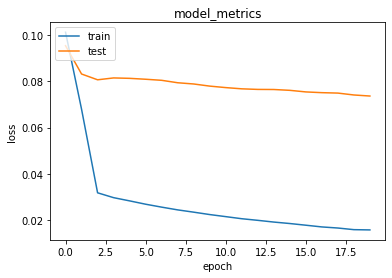

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_metrics')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()